#Sources:
https://www.datacamp.com/community/tutorials/deep-learning-python?utm_source=adwords_ppc#

https://stackoverflow.com/questions/50125844/how-to-standard-scale-a-3d-matrix/50134698

https://keras.io/guides/sequential_model/

https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras

https://note.nkmk.me/en/python-numpy-reshape-usage/

https://debuggercafe.com/adam-algorithm-for-deep-learning-optimization/

# Libraries Loading

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers

from sklearn.preprocessing import StandardScaler

#Functions

In [23]:
def scaling_data_to_0_1(x_train, x_test, normalize_factor):

  # Scale images to the [0, 1] range
  x_train = x_train.astype("float32") / normalize_factor
  x_test = x_test.astype("float32") / normalize_factor

  # Make sure images have shape (28, 28, 1)
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)

  return x_train, x_test


def targetVar_categoricalEncoding(y_train, y_test, num_classes):
  # convert class vectors to "binary" class matrices (one-hot)
  y_train = tf.keras.utils.to_categorical(y_train, num_classes)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes)
  return y_train, y_test


def print_info_train_test(x_train, x_test, y_train, y_test, s):
  print(s)
  print("x_train shape: ", x_train.shape)
  print("train samples: ", x_train.shape[0]); print("test samples: ",x_test.shape[0])
  print('y_train: ', y_train.shape); print('y_test: ', y_test.shape)


def show_random_images(numImages, dataset, rows, cols):

  for i in range(numImages):
    rand_index = np.random.choice(dataset.shape[0])
    rand_img = dataset[rand_index]
    plt.figure()
    plt.imshow(rand_img.reshape(rows, cols))


def plot_accuracy_loss(history):

  plt.plot(history.history['val_accuracy'], label='validation')
  plt.plot(history.history['accuracy'], label='train')
  plt.title('Accuracy')
  plt.legend()
  plt.show(); plt.clf()

  plt.plot(history.history['val_loss'], label='validation')
  plt.plot(history.history['loss'], label='train')
  plt.title('Loss')
  plt.legend()
  plt.show(); plt.clf()


def standarizing_data(x_train, x_test):
  '''
  Only the training set will be used to calculate standarization's coefficients.
  However, standarization will be applied both to training and testing data.
  '''
  scaler = StandardScaler().fit(x_train.reshape(-1, x_train.shape[-1]))
  
  # Standarizing - scaling the training set
  x_train_standard = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
  # Standarizing - scaling the testing set
  x_test_standard = scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)
  '''
  x_train_standard = np.expand_dims(x_train_standard, -1)
  x_test_standard = np.expand_dims(x_test_standard, -1)
  '''
  return x_train_standard, x_test_standard  


def buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag):
  # Initialize the constructor
  model = tf.keras.Sequential()

  # Adding input layer 
  if flattenFlag:
    model.add(layers.Flatten(input_shape = input_shape ))# from 28x28x1 => 784x1
  else:
    model.add(layers.Dense(input_output_units[0], activation=input_output_AFs[0], input_shape = input_shape))
  
  # Addind hidden layers
  for i in range(len(hiddenLayers_AFs)):
    model.add(layers.Dense(hiddenLayers_units[i], activation=hiddenLayers_AFs[i]))
  
  # Adding output layer 
  model.add(layers.Dense(input_output_units[1], activation=input_output_AFs[1]))

  model.summary()

  return model


def trainModel(model, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train, y_train):
  model.compile(loss = loss_fun, optimizer = opt, metrics = metrics )
  model_history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = valSplit)
  return model, model_history


def evalModel(model, x_test, y_test, verb):
  # Model Evaluating
  score = model.evaluate(x_test, y_test, verbose = verb)
  print("\nTest loss:", score[0]); print("\nTest accuracy:", score[1])


# MLP_MNIST_Example: Data Loading

Initial dataset MLP_MNIST
x_train shape:  (60000, 28, 28, 1)
train samples:  60000
test samples:  10000
y_train:  (60000,)
y_test:  (10000,)


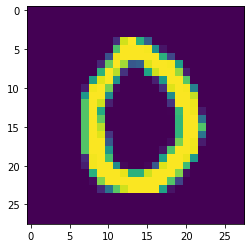

In [24]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
normalize_factor = 255
s="Initial dataset MLP_MNIST"

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling images to the [0, 1] range and making sure images have shape (28, 28, 1)
x_train, x_test = scaling_data_to_0_1(x_train, x_test, normalize_factor)

print_info_train_test(x_train, x_test, y_train, y_test, s)

# convert class vectors to "binary" class matrices (one-hot)
y_train, y_test = targetVar_categoricalEncoding(y_train,y_test,num_classes)

#print_info_train_test(x_train, x_test, y_train, y_test,s)

# show a random image
numImages=1
show_random_images(numImages, x_train, input_shape[0], input_shape[1])

# MLP_MNIST_Example: Model Building - Training - Evaluating - Model presentation

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [==============================] - 2s 5ms/step - loss: 1.2798 - accuracy: 0.6900 - val_loss: 0.6615 - val_accuracy: 0.8687
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.6026 - accuracy: 0.8551 - val_loss: 0.4358 - val_accuracy: 0.8975
Epoch 3/5
422/422 [==========

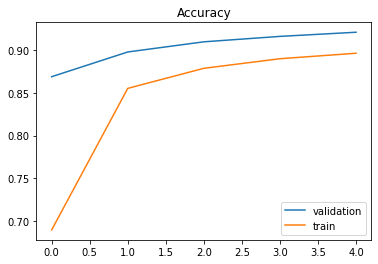

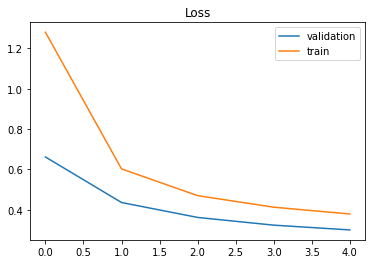

<Figure size 432x288 with 0 Axes>

In [25]:
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[128]
flattenFlag=True

model = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)


# Model Training
epochs, batch_size, valSplit = 5, 128, 0.1
loss_fun, opt = "categorical_crossentropy", "sgd"
metrics = ["accuracy"]

model, history = trainModel(model, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train, y_train)

# Model Evaluating
verb=1
evalModel(model, x_test, y_test, verb)

# Model presentation
plot_accuracy_loss(history)

# MNIST_ANSWERS: Ερώτημα 1 - Data Loading

Standarized dataset MNIST
x_train shape:  (60000, 28, 28, 1)
train samples:  60000
test samples:  10000
y_train:  (60000, 10)
y_test:  (10000, 10)


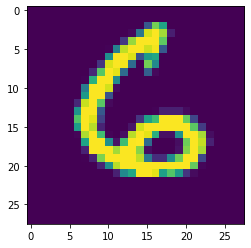

In [26]:
s="Standarized dataset MNIST"
# Standarization - Transforming the data (images) to  ~N(0,1)
x_train_standard, x_test_standard = standarizing_data(x_train, x_test)

print_info_train_test(x_train_standard, x_test_standard, y_train, y_test, s)

# show a random image
numImages=1
show_random_images(numImages, x_train_standard, input_shape[0], input_shape[1])


# MNIST_ANSWERS: Ερώτημα 1 - Model Building - Training - Evaluating - Presentation



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [==============================] - 2s 5ms/step - loss: 0.5998 - accuracy: 0.8239 - val_loss: 0.2966 - val_accuracy: 0.9172
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.3240 - accuracy: 0.9057 - val_loss: 0.2395 - val_accuracy: 0.9328
Epoch 3/5
422/422 [==========

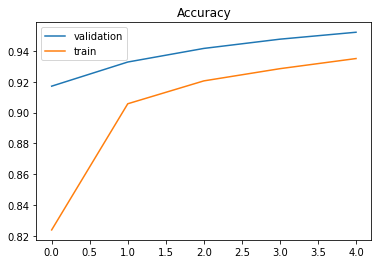

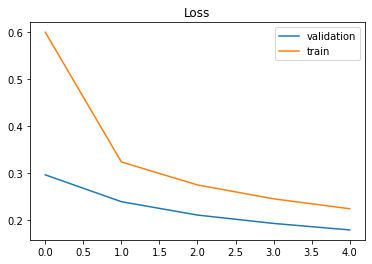

<Figure size 432x288 with 0 Axes>

In [27]:
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[128]
flattenFlag=True

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)

# Model Training
epochs, batch_size, valSplit = 5, 128, 0.1
loss_fun, opt = "categorical_crossentropy", "sgd"
metrics = ["accuracy"]

standarDataModel_sgd, standarDataModel_sgd_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_history)

#  MNIST_ANSWERS: Ερώτημα 2

Epoch 1/5
422/422 [==============================] - 2s 5ms/step - loss: 0.1758 - accuracy: 0.9479 - val_loss: 0.1030 - val_accuracy: 0.9717
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.1018 - accuracy: 0.9692 - val_loss: 0.0905 - val_accuracy: 0.9728
Epoch 3/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0731 - accuracy: 0.9779 - val_loss: 0.0865 - val_accuracy: 0.9770
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0541 - accuracy: 0.9835 - val_loss: 0.0833 - val_accuracy: 0.9758
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.9709

Test loss: 0.09149569272994995

Test accuracy: 0.9708999991416931


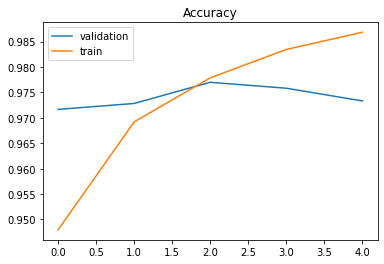

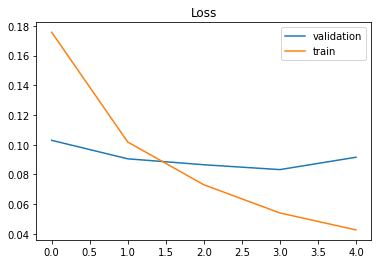

Epoch 1/5
422/422 [==============================] - 2s 5ms/step - loss: 0.0229 - accuracy: 0.9941 - val_loss: 0.0700 - val_accuracy: 0.9790
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0181 - accuracy: 0.9961 - val_loss: 0.0695 - val_accuracy: 0.9788
Epoch 3/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0155 - accuracy: 0.9967 - val_loss: 0.0688 - val_accuracy: 0.9807
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9976 - val_loss: 0.0680 - val_accuracy: 0.9803
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9806

Test loss: 0.06551187485456467

Test accuracy: 0.9805999994277954


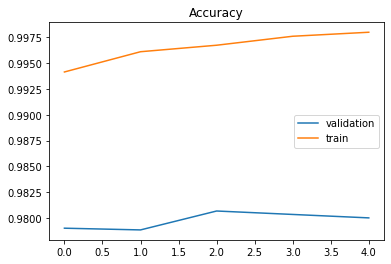

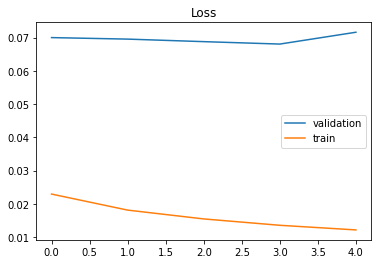

<Figure size 432x288 with 0 Axes>

In [28]:
# Model Building
# input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag --> same as above
# standarDataModel --> same as above

# Model Training
# epochs, batch_size, valSplit loss_fun, metrics --> same as above 

#adam model
opt = "adam"
standarDataModel_adam, standarDataModel_adam_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_adam, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_adam_history)


#sgd_momentum model
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
standarDataModel_sgd_momentum, standarDataModel_sgd_momentum_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd_momentum, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_momentum_history)

**Σχολιασμός Ερωτήματος 2:**

Τόσο στο 1ο όσο και στο 2ο ερώτημα παρουσιάζονται μοντέλα AI NNs, ενός hidden layer, με A.F. στο hidden layer την ReLU, στο output layer τον softMax κοινο αριθμό κόμβων-νευρώνων ανα layer σε καθε μοντέλο αντίστοιχα.
Κοινά ακόμη είναι οι εποχές εκπαίδευσης, το batch size, το ποσοστό με το οποίο πραγματοποιείται το splitting στο training phase (ώστε να προκύψουν τα σχετικά testing-validation sets) και η loss function.

Η διαφορά ανά μοντέλο εντοπίζεται στον αλγόριθμο που χρησιμοποιείται προκειμένου να ελαχιστοποιηθεί η loss function.

*Ερώτημα 1 - μοντέλο 'sgd' :*

Test loss: 0.2082195281982422

Test accuracy: 0.9426000118255615


*Ερώτημα 2 - μοντέλο 'adam' :*

Test loss: 0.09149569272994995

Test accuracy: 0.9708999991416931


*Ερώτημα 2 - μοντέλο 'sgd -with- momentum' :*

Test loss: 0.06551187485456467

Test accuracy: 0.9805999994277954

Παρατηρείται ότι τα δύο μοντέλα του 2ου ερωτήματος επιτυγχάνουν μεγαλύτερο accuracy και μικρότερες (τελικές) τιμές στο loss function συγκριτικά με το μοντέλο του 1ου. Ανάμεσα στα δυο μοντέλα του 2ου ερωτήματος αποδοτικότερο με δεδομένη την τιμή της accuracy (μεγαλύτερη) και της loss function (μικρότερη) κρίνεται το 2ο.

Ωστόσο, παρατηρώντας τα διαγράμματα, θα μπορούσε κανείς να συμπεράνει πως στο μοντέλο 'adam' υπάρχει η υποψία overfitting. Συγκεκριμένα, το accuracy του training set από (μια εποχή και έπειτα) αυξάνει σταθερά, με την καμπύλη του να βρίσκεται "πάνω"  από εκείνη του accuracy του validation set. Αντίστροφα, η τιμή της loss function του training set από (μια εποχή και έπειτα) μειώνεται σταθερά, με την καμπύλη της να βρίσκεται "κάτω"  από εκείνη της loss function του validation set.

Σε ό,τι αφορά το μοντέλο 'sgd -with- momentum', με βάση της καμπύλες των διαγραμμάτων θα θεωρούνταν (σχεδόν) βέβαιο πως υπάρχει overfitting.  (To training set έχει σταθερά καλύτερες επιδόσεις απο το validation set).

# MNIST_ANSWERS: Ερώτημα 3

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 512)               401920    
                                                                 
 dense_33 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [==============================] - 2s 5ms/step - loss: 0.5600 - accuracy: 0.8432 - val_loss: 0.2713 - val_accuracy: 0.9268
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.3013 - accuracy: 0.9153 - val_loss: 0.2183 - val_accuracy: 0.9405
Epoch 3/5
422/422 [==========

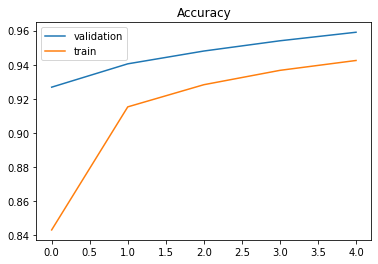

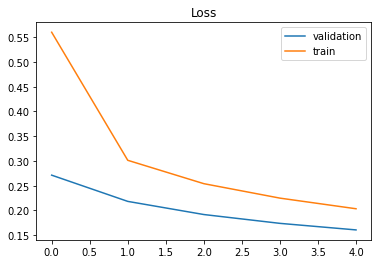

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               100480    
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 
 dense_37 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [============================

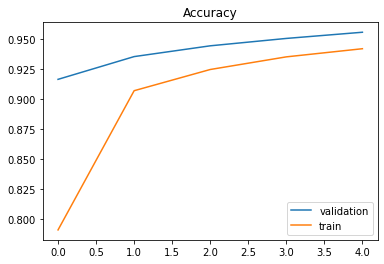

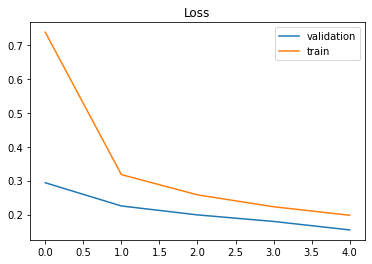

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               200960    
                                                                 
 dense_39 (Dense)            (None, 256)               65792     
                                                                 
 dense_40 (Dense)            (None, 256)               65792     
                                                                 
 dense_41 (Dense)            (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [============================

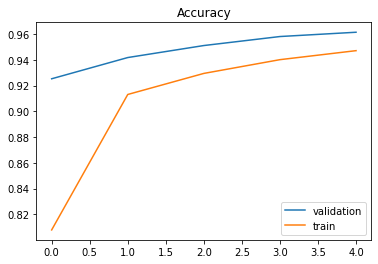

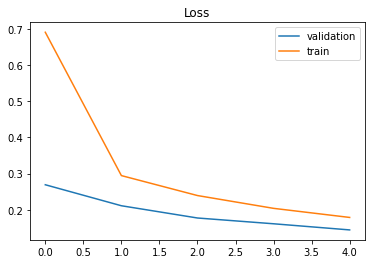

<Figure size 432x288 with 0 Axes>

In [29]:
# Wider model
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[512] #128*2*2=512
flattenFlag=True

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)

# Model Training
# epochs, batch_size, valSplit loss_fun, metrics --> same as above 
opt = "sgd"
standarDataModel_sgd, standarDataModel_sgd_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_history)



# Deeper model
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu", "relu", "relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[128, 128, 128] 
flattenFlag=True

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)

# Model Training
# epochs, batch_size, valSplit loss_fun, metrics, opt --> same as above 
standarDataModel_sgd, standarDataModel_sgd_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_history)


# Bigger model
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu", "relu", "relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[256, 256, 256] 
flattenFlag=True

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)

# Model Training
# epochs, batch_size, valSplit loss_fun, metrics, opt --> same as above 
standarDataModel_sgd, standarDataModel_sgd_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_history)

**Σχολιασμός Ερωτήματος 3:**

Τόσο στο 1ο όσο και στο 3ο ερώτημα παρουσιάζονται μοντέλα AI NNs, τα οποία εκπαιδευτηκαν για τον ίδιο αριθμό εποχών εκπαίδευσης,  το ίδιο batch size και  ποσοστό με το οποίο πραγματοποιείται το splitting στο training phase (ώστε να προκύψουν τα σχετικά testing-validation sets), την ίδια loss function και τον ίδιο αλγόριθμο ελαχιστοποήσης ('sgd'). Επιπλέον, με εξαίρεση το output layer στο οποίο ως A.F. εφαρμόζεται ο softMax, σε οποιοδήποτε άλλο hidden layer ως A.F. εφαρμόζεται η ReLU.

Η διαφορά των μοντέλων εντοπίζεται είτε στον αριθμό κόμβων-νευρώνων στο(-α) hidden layer(s) είτε στο πλήθος των hidden layers. 


*Ερώτημα 1 - μοντέλο 'sgd' :*

Hidden layers' number: 1 ~~ Nodes' number per hidden layer: 128

*Ερώτημα 1 - μοντέλο 'sgd' :*

Test loss: 0.2082195281982422

Test accuracy: 0.9426000118255615


*Ερώτημα 3 - wider model  :*

Hidden layers' number: 1 ~~ Nodes' number per hidden layer: 512

Test loss: 0.19382204115390778

Test accuracy: 0.9452999830245972


*Ερώτημα 3 - deeper model :*

Hidden layers' number: 3 ~~ Nodes' number per hidden layer: 128

Test loss: 0.18360154330730438

Test accuracy: 0.9451000094413757


*Ερώτημα 3 - bigger model :*

Hidden layers' number: 3 ~~ Nodes' number per hidden layer: 256

Test loss: 0.16616399586200714

Test accuracy: 0.9492999911308289

Διαπιστώνεται ότι τα 3 μοντέλα του 3ου ερωτήματος έχουν (οριακά) καλύτερες επιδόσεις από το μοντέλο του 1ου, ενώ θα μπορούσαν να χαρακτηριστούν ως "ισάξια" μεταξύ τους, με βάση την τιμή της accuracy  και της loss function, σε κάθε περίπτωση.

Επομένως, η περεταίρω διεύρυνση του δικτύου, δεν προσέφερε κάτι για το συγκεκριμένο dataset.

# MLP_F_MNIST_Example: Data Loading

Initial dataset MLP_F_MNIST
x_train shape:  (60000, 28, 28, 1)
train samples:  60000
test samples:  10000
y_train:  (60000,)
y_test:  (10000,)


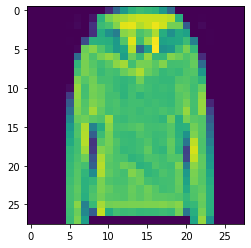

In [30]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
normalize_factor = 255
s="Initial dataset MLP_F_MNIST"

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Scaling images to the [0, 1] range and making sure images have shape (28, 28, 1)
x_train, x_test = scaling_data_to_0_1(x_train, x_test, normalize_factor)

print_info_train_test(x_train, x_test, y_train, y_test, s)

# convert class vectors to "binary" class matrices (one-hot)
y_train, y_test = targetVar_categoricalEncoding(y_train,y_test,num_classes)

#print_info_train_test(x_train, x_test, y_train, y_test,s)

# show a random image
numImages=1
show_random_images(numImages, x_train, input_shape[0], input_shape[1])

#MLP_F_MNIST_Example: Model Building - Training - Evaluating - Model presentation

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               100480    
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 3s 5ms/step - loss: 1.0963 - accuracy: 0.6761 - val_loss: 0.7661 - val_accuracy: 0.7568
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.7047 - accuracy: 0.7741 - val_loss: 0.6414 - val_accuracy: 0.7872
Epoch 3/15
422/422 [=======

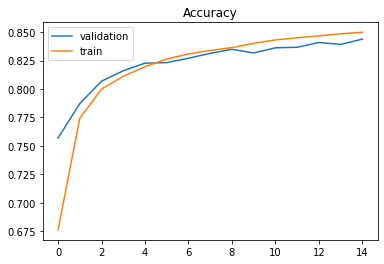

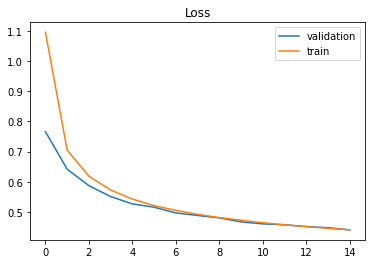

<Figure size 432x288 with 0 Axes>

In [31]:
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[128]
flattenFlag=True

model = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)


# Model Training
epochs, batch_size, valSplit = 15, 128, 0.1
loss_fun, opt = "categorical_crossentropy", "sgd"
metrics = ["accuracy"]

model, history = trainModel(model, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train, y_train)

# Model Evaluating
verb=1
evalModel(model, x_test, y_test, verb)

# Model presentation
plot_accuracy_loss(history)

#F_MNIST_ANSWERS: Ερώτημα 1 - Data Loading

Standarized dataset F-MNIST
x_train shape:  (60000, 28, 28, 1)
train samples:  60000
test samples:  10000
y_train:  (60000, 10)
y_test:  (10000, 10)


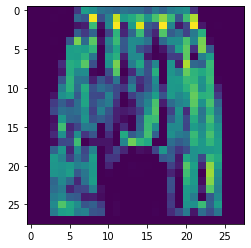

In [32]:
s="Standarized dataset F-MNIST"
# Standarization - Transforming the data (images) to  ~N(0,1)
x_train_standard, x_test_standard = standarizing_data(x_train, x_test)

print_info_train_test(x_train_standard, x_test_standard, y_train, y_test, s)

# show a random image
numImages=1
show_random_images(numImages, x_train_standard, input_shape[0], input_shape[1])

#F_MNIST_ANSWERS: Ερώτημα 1 - Model Building - Training - Evaluating - Presentation

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 128)               100480    
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [==============================] - 2s 5ms/step - loss: 0.7265 - accuracy: 0.7519 - val_loss: 0.5474 - val_accuracy: 0.8008
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.5083 - accuracy: 0.8231 - val_loss: 0.4781 - val_accuracy: 0.8290
Epoch 3/5
422/422 [==========

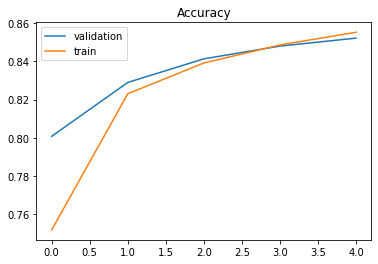

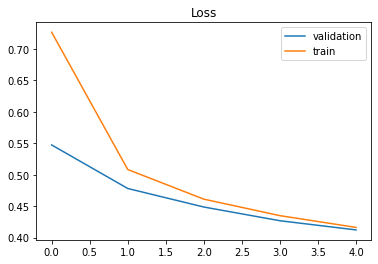

<Figure size 432x288 with 0 Axes>

In [33]:
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[128]
flattenFlag=True

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)

# Model Training
epochs, batch_size, valSplit = 5, 128, 0.1
loss_fun, opt = "categorical_crossentropy", "sgd"
metrics = ["accuracy"]

standarDataModel_sgd, standarDataModel_sgd_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_history)

#F_MNIST_ANSWERS: Ερώτημα 2

Epoch 1/5
422/422 [==============================] - 3s 5ms/step - loss: 0.4175 - accuracy: 0.8501 - val_loss: 0.3964 - val_accuracy: 0.8583
Epoch 2/5
422/422 [==============================] - 2s 5ms/step - loss: 0.3512 - accuracy: 0.8709 - val_loss: 0.3667 - val_accuracy: 0.8660
Epoch 3/5
422/422 [==============================] - 2s 5ms/step - loss: 0.3152 - accuracy: 0.8858 - val_loss: 0.3428 - val_accuracy: 0.8745
Epoch 4/5
422/422 [==============================] - 2s 5ms/step - loss: 0.2920 - accuracy: 0.8920 - val_loss: 0.3431 - val_accuracy: 0.8792
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3614 - accuracy: 0.8717

Test loss: 0.36135318875312805

Test accuracy: 0.8716999888420105


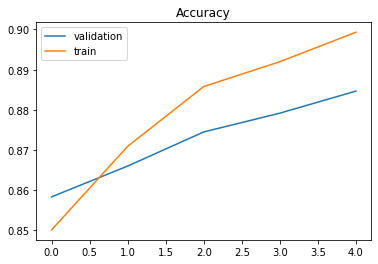

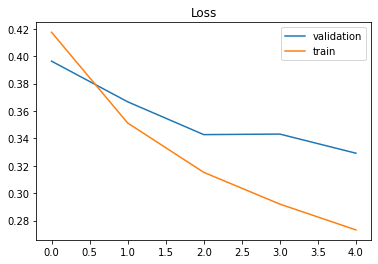

Epoch 1/5
422/422 [==============================] - 3s 5ms/step - loss: 0.2440 - accuracy: 0.9093 - val_loss: 0.3195 - val_accuracy: 0.8892
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.2324 - accuracy: 0.9146 - val_loss: 0.3237 - val_accuracy: 0.8817
Epoch 3/5
422/422 [==============================] - 2s 4ms/step - loss: 0.2242 - accuracy: 0.9168 - val_loss: 0.3102 - val_accuracy: 0.8908
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 0.2170 - accuracy: 0.9206 - val_loss: 0.3126 - val_accuracy: 0.8910
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3562 - accuracy: 0.8779

Test loss: 0.3561682105064392

Test accuracy: 0.8779000043869019


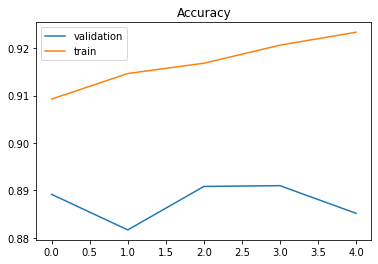

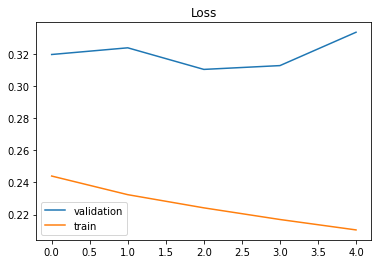

<Figure size 432x288 with 0 Axes>

In [34]:
# Model Building
# input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag --> same as above
# standarDataModel --> same as above

# Model Training
# epochs, batch_size, valSplit loss_fun, metrics --> same as above 

#adam model
opt = "adam"
standarDataModel_adam, standarDataModel_adam_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_adam, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_adam_history)


#sgd_momentum model
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
standarDataModel_sgd_momentum, standarDataModel_sgd_momentum_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd_momentum, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_momentum_history)

Σχολιασμός Ερωτήματος 2:

Τόσο στο 1ο όσο και στο 2ο ερώτημα παρουσιάζονται μοντέλα AI NNs, ενός hidden layer, με A.F. στο hidden layer την ReLU, στο output layer τον softMax κοινο αριθμό κόμβων-νευρώνων ανα layer σε καθε μοντέλο αντίστοιχα. Κοινά ακόμη είναι οι εποχές εκπαίδευσης, το batch size, το ποσοστό με το οποίο πραγματοποιείται το splitting στο training phase (ώστε να προκύψουν τα σχετικά testing-validation sets) και η loss function.

Η διαφορά ανά μοντέλο εντοπίζεται στον αλγόριθμο που χρησιμοποιείται προκειμένου να ελαχιστοποιηθεί η loss function.

Ερώτημα 1 - μοντέλο 'sgd' :

Test loss: 0.4437951147556305

Test accuracy: 0.8414000272750854


Ερώτημα 2 - μοντέλο 'adam' :

Test loss: 0.36135318875312805

Test accuracy: 0.8716999888420105

Ερώτημα 2 - μοντέλο 'sgd -with- momentum' :

Test loss: 0.3561682105064392

Test accuracy: 0.8779000043869019

Παρατηρείται ότι τα δύο μοντέλα του 2ου ερωτήματος επιτυγχάνουν μεγαλύτερο accuracy και μικρότερες (τελικές) τιμές στο loss function συγκριτικά με το μοντέλο του 1ου. Ανάμεσα στα δυο μοντέλα του 2ου ερωτήματος αποδοτικότερο με δεδομένη την τιμή της accuracy (μεγαλύτερη) και της loss function (μικρότερη) κρίνεται το 2ο.

Ωστόσο, παρατηρώντας τα διαγράμματα, θα μπορούσε κανείς να συμπεράνει πως στο μοντέλο 'adam' υπάρχει η υποψία overfitting. Συγκεκριμένα, το accuracy του training set από (μια εποχή και έπειτα) αυξάνει σταθερά, με την καμπύλη του να βρίσκεται "πάνω" από εκείνη του accuracy του validation set. Αντίστροφα, η τιμή της loss function του training set από (μια εποχή και έπειτα) μειώνεται σταθερά, με την καμπύλη της να βρίσκεται "κάτω" από εκείνη της loss function του validation set.

Σε ό,τι αφορά το μοντέλο 'sgd -with- momentum', με βάση της καμπύλες των διαγραμμάτων θα θεωρούνταν (σχεδόν) βέβαιο πως υπάρχει overfitting. (To training set έχει σταθερά καλύτερες επιδόσεις απο το validation set).

#MNIST_ANSWERS: Ερώτημα 3

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 512)               401920    
                                                                 
 dense_47 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [==============================] - 3s 5ms/step - loss: 0.6645 - accuracy: 0.7742 - val_loss: 0.5059 - val_accuracy: 0.8192
Epoch 2/5
422/422 [==============================] - 2s 5ms/step - loss: 0.4758 - accuracy: 0.8352 - val_loss: 0.4526 - val_accuracy: 0.8403
Epoch 3/5
422/422 [==========

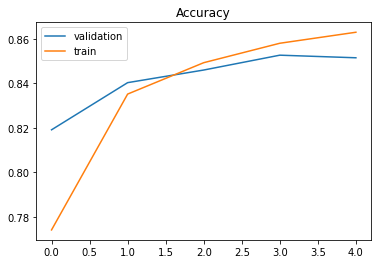

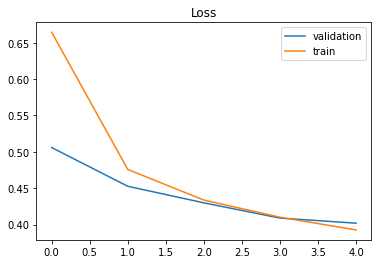

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               100480    
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dense_51 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [============================

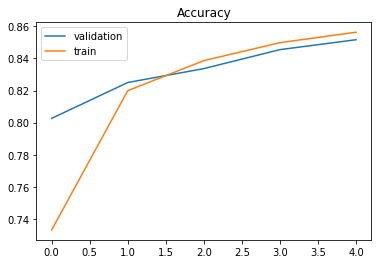

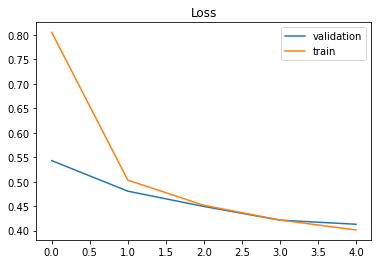

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 256)               200960    
                                                                 
 dense_53 (Dense)            (None, 256)               65792     
                                                                 
 dense_54 (Dense)            (None, 256)               65792     
                                                                 
 dense_55 (Dense)            (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [============================

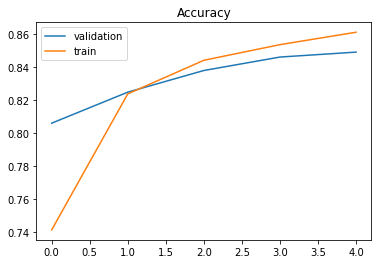

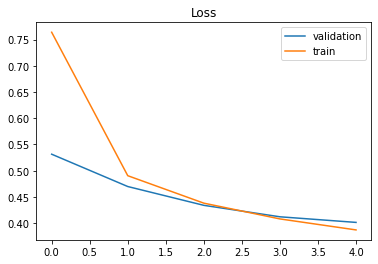

<Figure size 432x288 with 0 Axes>

In [35]:
# Wider model
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[512] #128*2*2=512
flattenFlag=True

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)

# Model Training
# epochs, batch_size, valSplit loss_fun, metrics --> same as above 
opt = "sgd"
standarDataModel_sgd, standarDataModel_sgd_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_history)



# Deeper model
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu", "relu","relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[128, 128, 128] 
flattenFlag=True

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)

# Model Training
# epochs, batch_size, valSplit loss_fun, metrics, opt --> same as above 
standarDataModel_sgd, standarDataModel_sgd_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_history)


# Bigger model
# Model Building
input_output_AFs = ["","softmax"] 
hiddenLayers_AFs = ["relu", "relu", "relu"]
input_output_units = [-1, num_classes]
hiddenLayers_units =[256, 256, 256] 
flattenFlag=True

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag)

# Model Training
# epochs, batch_size, valSplit loss_fun, metrics, opt --> same as above 
standarDataModel_sgd, standarDataModel_sgd_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train)

# Model Evaluating
verb=1
evalModel(standarDataModel_sgd, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_sgd_history)

Σχολιασμός Ερωτήματος 3:

Τόσο στο 1ο όσο και στο 3ο ερώτημα παρουσιάζονται μοντέλα AI NNs, τα οποία εκπαιδευτηκαν για τον ίδιο αριθμό εποχών εκπαίδευσης, το ίδιο batch size και ποσοστό με το οποίο πραγματοποιείται το splitting στο training phase (ώστε να προκύψουν τα σχετικά testing-validation sets), την ίδια loss function και τον ίδιο αλγόριθμο ελαχιστοποήσης ('sgd'). Επιπλέον, με εξαίρεση το output layer στο οποίο ως A.F. εφαρμόζεται ο softMax, σε οποιοδήποτε άλλο hidden layer ως A.F. εφαρμόζεται η ReLU.

Η διαφορά των μοντέλων εντοπίζεται είτε στον αριθμό κόμβων-νευρώνων στο(-α) hidden layer(s) είτε στο πλήθος των hidden layers.

Ερώτημα 1 - μοντέλο 'sgd' :

Hidden layers' number: 1 ~~ Nodes' number per hidden layer: 128

Ερώτημα 1 - μοντέλο 'sgd' :

Test loss: 0.4437951147556305

Test accuracy: 0.8414000272750854


Ερώτημα 3 - wider model :

Hidden layers' number: 1 ~~ Nodes' number per hidden layer: 512

Test loss: 0.4295448362827301

Test accuracy: 0.8461999893188477


Ερώτημα 3 - deeper model :

Hidden layers' number: 3 ~~ Nodes' number per hidden layer: 128

Test loss: 0.4351672828197479

Test accuracy: 0.8438000082969666


Ερώτημα 3 - bigger model :

Hidden layers' number: 3 ~~ Nodes' number per hidden layer: 256


Test loss: 0.4267562925815582

Test accuracy: 0.8446999788284302


Διαπιστώνεται ότι τα 3 μοντέλα του 3ου ερωτήματος έχουν (οριακά) καλύτερες επιδόσεις από το μοντέλο του 1ου, ενώ θα μπορούσαν να χαρακτηριστούν ως "ισάξια" μεταξύ τους, με βάση την τιμή της accuracy και της loss function, σε κάθε περίπτωση.

Επομένως, η περεταίρω διεύρυνση του δικτύου, δεν προσέφερε κάτι για το συγκεκριμένο dataset.